# EDA con las preguntas restantes

Ya con el dataset limpio y depurado, podemos comenzar a realizar análisis exploratorio para extraer información a partir de los registros y las preguntas.

Con el dataset depurado vamos a intentar responder a las siguientes preguntas, utiliza gráficos para ilustrar tus respuestas:

1. **Distribución de las preguntas por:**
    1. Tema
    2. Entidad
    3. Género
    4. Grupos vulnerables
    5. Grupos de edad (13-18, 18-25, 25-40 y mayores)


In [1]:
import pandas as pd

limpio_df = pd.read_csv('./out_datasets/3-1_base_limpia.csv')

# Distribution of questions by theme
theme_counts = limpio_df['tema'].value_counts()
print("Distribution of questions by theme:")
print(theme_counts)

# Distribution of questions by entity
entity_counts = limpio_df['entidad'].value_counts()
print("Distribution of questions by entity:")
print(entity_counts)

# Distribution of questions by gender
gender_counts = limpio_df['genero'].value_counts()
print("Distribution of questions by gender:")
print(gender_counts)

# Distribution of questions by vulnerable groups
vulnerable_counts = limpio_df['grupo_discriminacion'].value_counts()
print("Distribution of questions by vulnerable groups:")
print(vulnerable_counts)

# Distribution of questions by age groups
age_counts = limpio_df['edad'].value_counts()
print("Distribution of questions by age groups:")
print(age_counts)


Distribution of questions by theme:
tema
Educación                                 2577
Salud                                     1652
Transparencia                             1333
No discriminación y grupos vulnerables    1285
Violencia en contra de las mujeres        1019
Combate a la corrupción                    960
Name: count, dtype: int64
Distribution of questions by entity:
entidad
Ciudad de México       2223
México                 1278
Jalisco                 546
Veracruz                510
Guanajuato              376
Puebla                  357
Nuevo León              269
Michoacán               267
Querétaro               243
Baja California         216
Chihuahua               187
Morelos                 182
Chiapas                 178
Hidalgo                 173
Yucatán                 166
Oaxaca                  156
Tabasco                 142
Tamaulipas              137
San Luis Potosí         135
Coahuila                130
Guerrero                130
Sonora            

2. **Cruces entre las variables del punto anterior:**
    1. Qué temas interesan más por género
    2. Por entidad
    3. Por grupo de edad


In [2]:
tema_genero = limpio_df.groupby(['tema', 'genero']).size()
print(tema_genero)

tema_entidad = limpio_df.groupby(['tema', 'entidad']).size()
print(tema_entidad)

tema_edad = limpio_df.groupby(['tema', 'edad']).size()
print(tema_edad)

tema                                    genero    
Combate a la corrupción                 Femenino       253
                                        Masculino      691
                                        Otro             9
                                        Selecciona       7
Educación                               Femenino       883
                                        Masculino     1639
                                        Otro            30
                                        Selecciona      25
No discriminación y grupos vulnerables  Femenino       510
                                        Masculino      714
                                        Otro            52
                                        Selecciona       9
Salud                                   Femenino       599
                                        Masculino     1015
                                        Otro            20
                                        Selecciona      18
Trans


3. **Separa las preguntas por tema y genera nubes de palabras y tablas de frecuencia para mostrar:**
    1. Qué palabras, bi-gramas o tri-gramas son los que más se repiten por tema
    2. Por entidad
    3. Por género


Importamos las herramientas necesarias

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import transformers
transformers.logging.set_verbosity(transformers.logging.ERROR)
from unidecode import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import re

stop_words = nltk.corpus.stopwords.words('spanish')
stop_words.append('mexico')
stop_words.append('ser') # Al parcer esta palabra se repite mucho
stop_words.append('of') # Dado que no se limpian las referencias, bibiliografias, etc, se agregan unas palabras en ingles
stop_words.append('corruption') 

nlp = spacy.load('es_core_news_md')

Se define nuevamente nuestras funciones de preprocesamiento

In [7]:
def lemmatizer(text: str) -> str:
    doc = nlp(text)
    return " ".join([word.lemma_ for word in doc])

def normalize_text(texto: str) -> str:
    #1. Quitamos el '¿'
    texto = texto.replace('¿', '')
    texto = texto.replace('@', 'o')

    #2. Removemos acentos
    texto = unidecode(texto)

    #3. Remover todo caracter no alfanumerico, lowercase, sin saltos de linea.
    texto = re.sub(r"[^a-zA-Z0-9\s]", '', texto, re.I|re.A).lower().strip()

    texto = lemmatizer(texto)

    #4. Tokenize document
    tokens = nltk.word_tokenize(texto)

    #5. filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]

    #6. re-create document from filtered tokens
    return ' '.join(filtered_tokens)

Se normaliza/limpia el texto

In [8]:
limpio_df['norm_text'] = limpio_df['pregunta'].apply(normalize_text)

### Por tema
Se consiguen los temas del debate

In [9]:
temas = list(set(limpio_df['tema']))
temas.sort()
temas

['Combate a la corrupción',
 'Educación',
 'No discriminación y grupos vulnerables',
 'Salud',
 'Transparencia',
 'Violencia en contra de las mujeres']

#### Nube de palabras

Se genera la nube de palabras

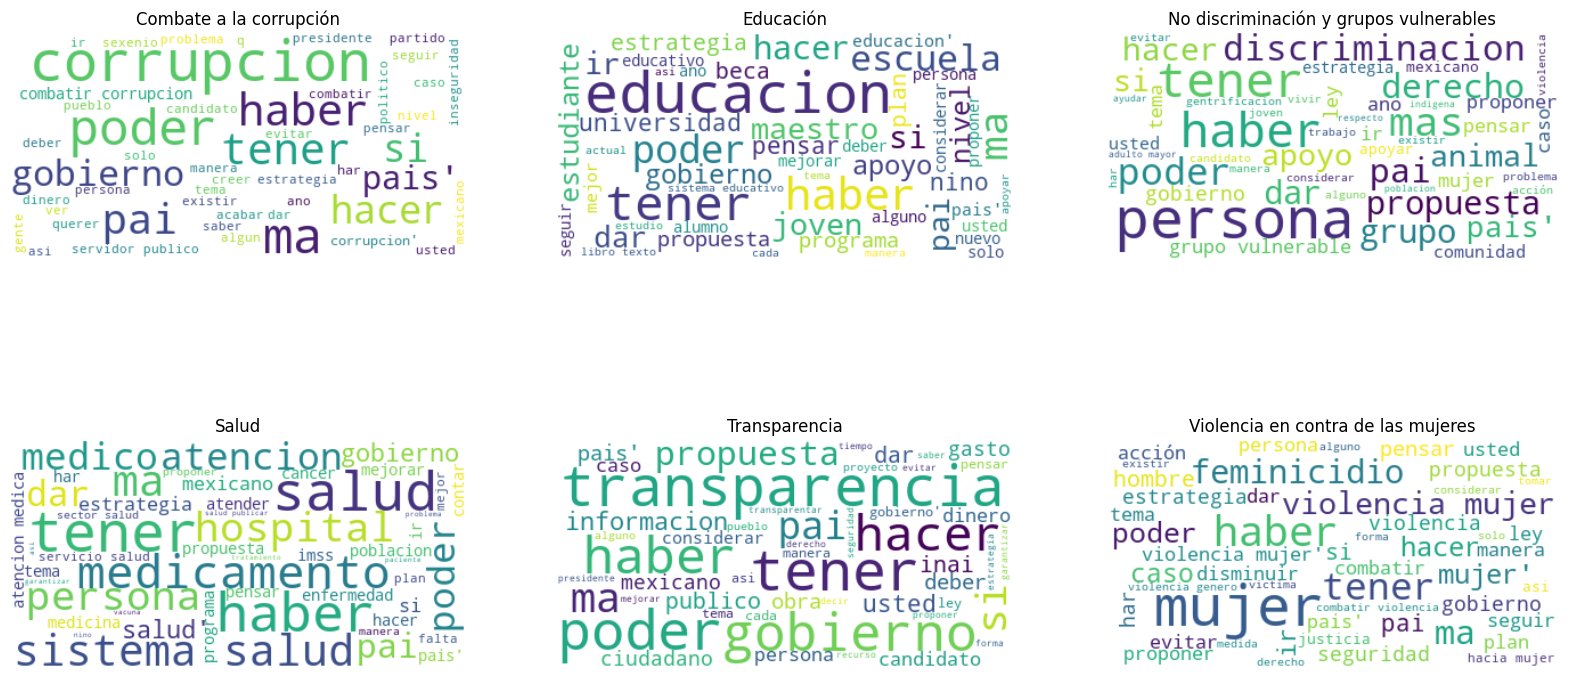

In [10]:
wc = WordCloud(background_color="white", stopwords=stop_words,
               max_words=50, max_font_size=50, random_state=42)
plt.rcParams['figure.figsize'] = [20, 15]

n = len(temas)
for i, tema in enumerate(temas):
    df = limpio_df[limpio_df['tema'] == tema]
    wc.generate(text=str(list(df['norm_text'])))
    plt.subplot(n // 2, n // 2, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(tema)
plt.show()

Generalizamos los pasos previos y probamos

In [11]:
def wc_generator_by(key: str):
    items = list(set(limpio_df[key]))
    items.sort()
    n = len(items)
    for i, item in enumerate(items):
        df = limpio_df[limpio_df[key] == item]
        wc.generate(text=str(list(df['norm_text'])))
        plt.subplot(n // 2, 3, i+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(item)
    plt.show()

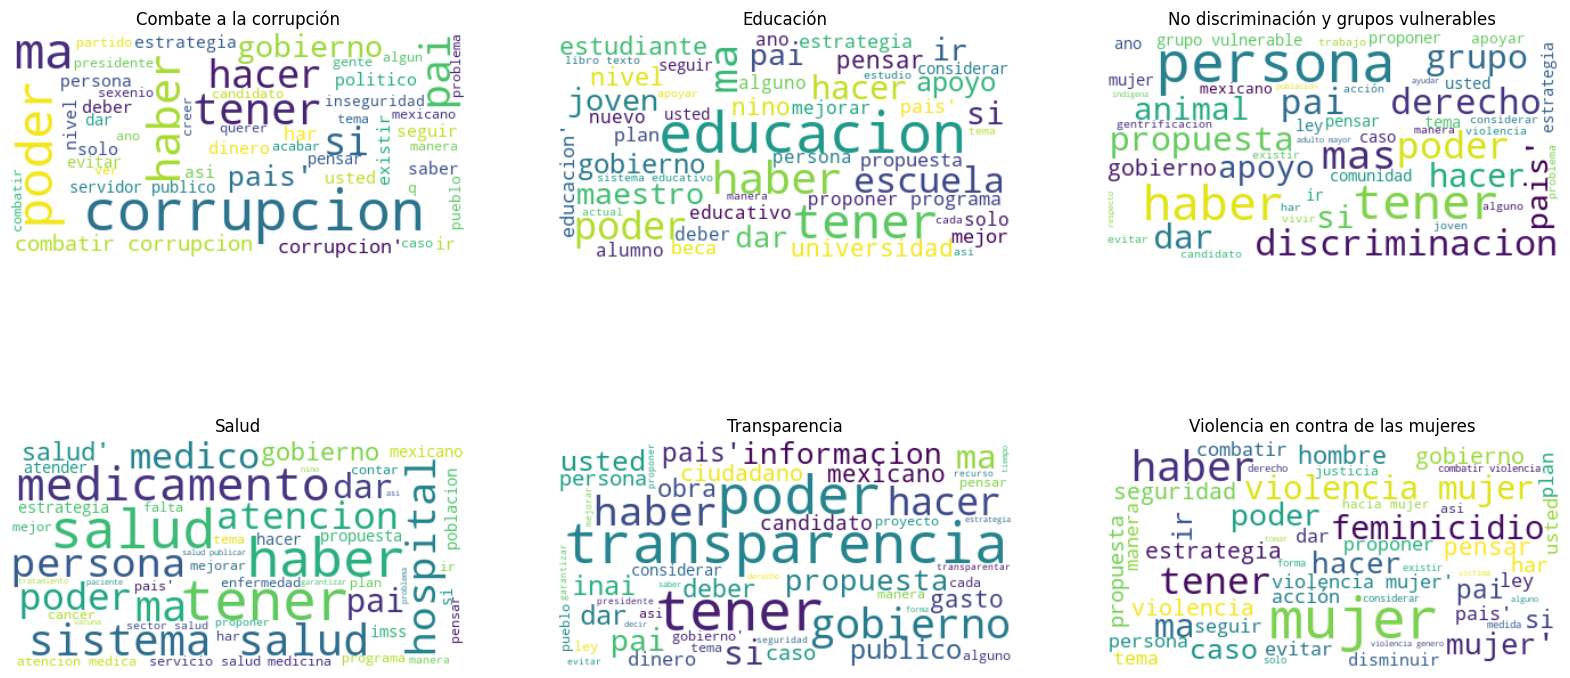

In [12]:
wc_generator_by('tema')

#### N-gramas

In [13]:
corpus = list(limpio_df[limpio_df['tema'] == 'Salud']['norm_text'])
cv = CountVectorizer().fit(corpus)
bag_of_words = cv.transform(corpus)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in
                cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda words: words[1], reverse=True)
words_freq[:10]


[('salud', 866),
 ('tener', 367),
 ('medicamento', 323),
 ('haber', 259),
 ('atencion', 230),
 ('sistema', 215),
 ('hospital', 209),
 ('medico', 178),
 ('servicio', 166),
 ('persona', 157)]

C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_25204\3232286553.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30);


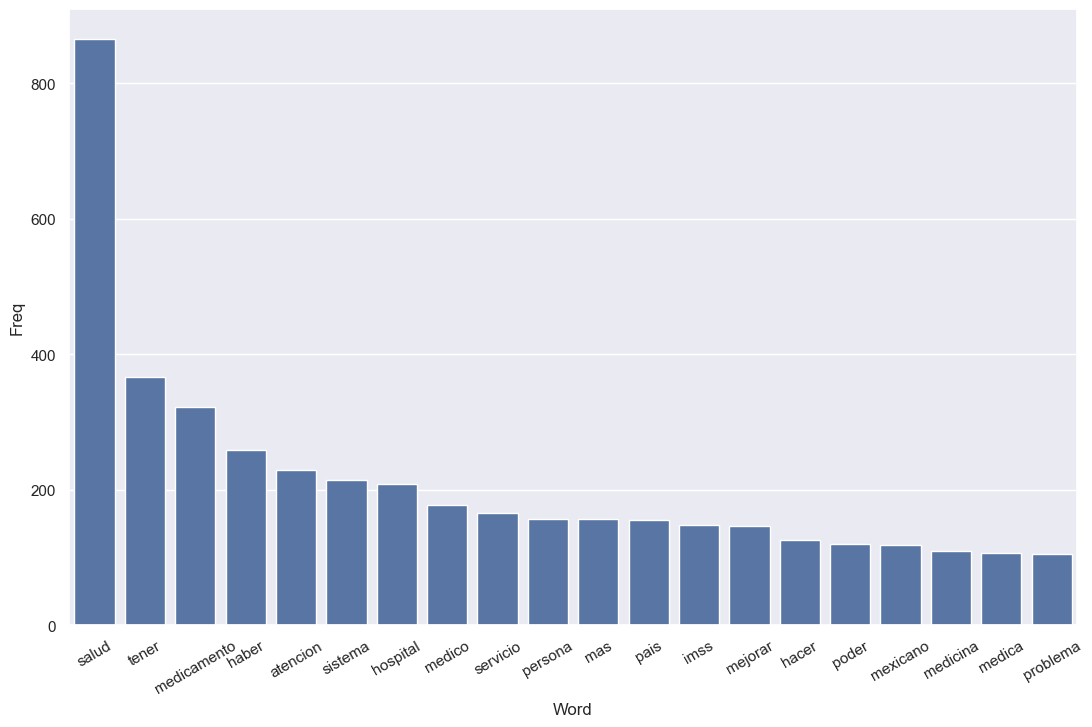

In [14]:
top_words = words_freq[:20]
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
sns.set_theme(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30);

Ploteamos los 6 temas en una sola figura

C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_25204\2996210336.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30);
C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_25204\2996210336.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30);
C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_25204\2996210336.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30);
C:\Users\Rodolfo\AppData\Local\Temp\ipykernel_25204\2996210336.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), ro

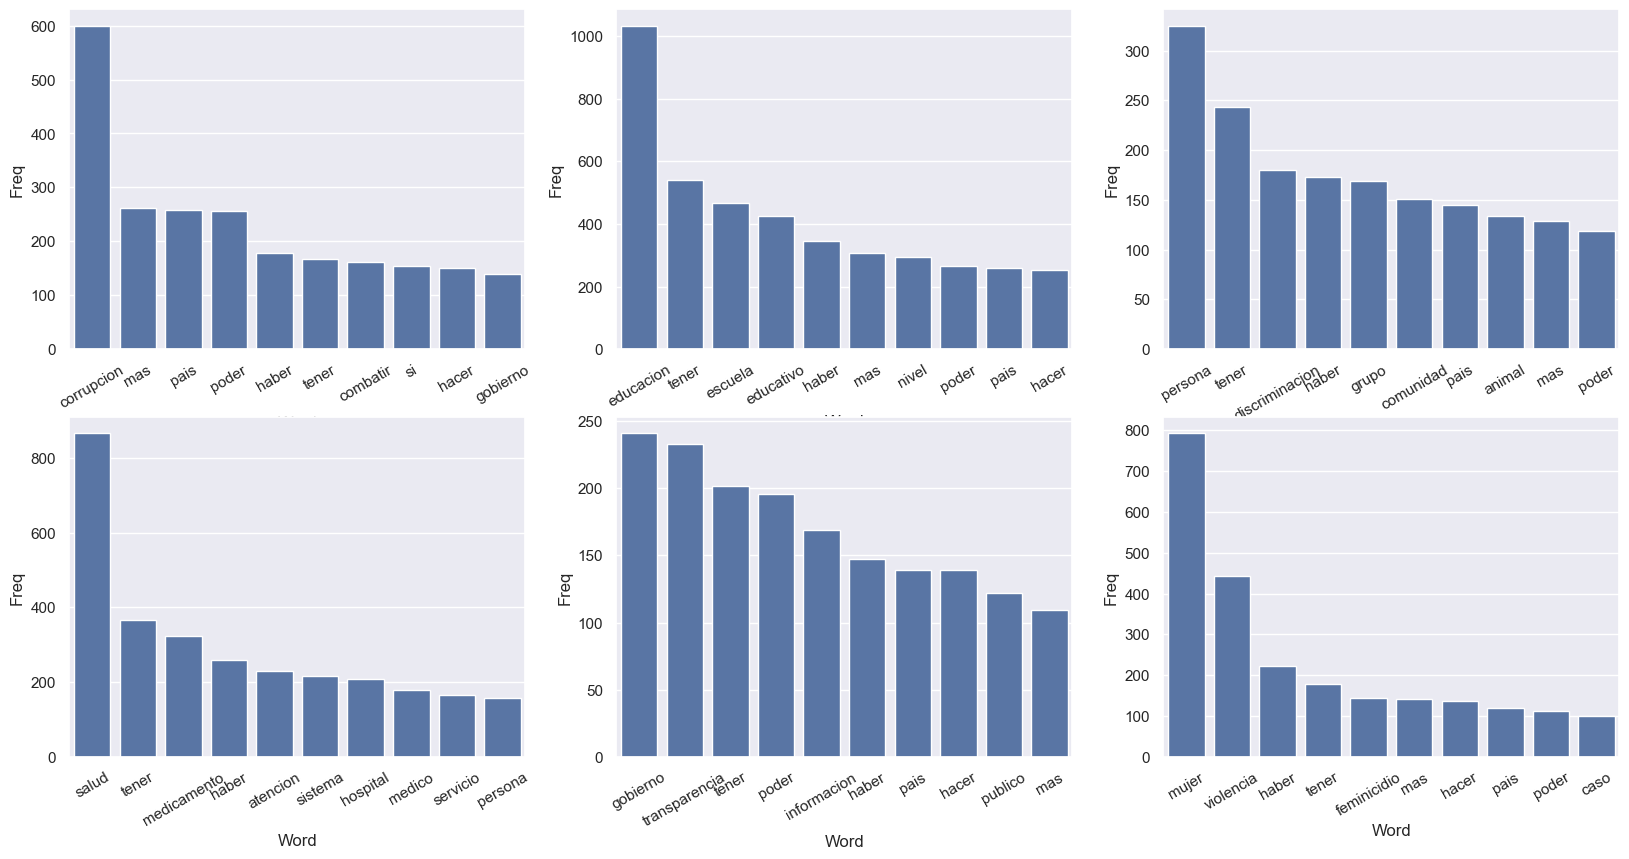

In [15]:
for i, tema in enumerate(temas):
    corpus = list(limpio_df[limpio_df['tema'] == tema]['norm_text'])
    cv = CountVectorizer().fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                    cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda words: words[1], reverse=True)
    top_words = words_freq[:10]
    top_df = pd.DataFrame(top_words)
    top_df.columns=["Word", "Freq"]
    #Barplot of most freq words
    sns.set_theme(rc={'figure.figsize':(20,15)})
    ax = plt.subplot(3, 3, i+1)
    g = sns.barplot(x="Word", y="Freq", data=top_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=30);

Generalizamos y aislamos cada proceso en su propia funcion

In [16]:
def get_top_n_words(corpus, n, **kwargs):
    cv = CountVectorizer(**kwargs).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda word: word[1], reverse=True)
    return words_freq[:n]

In [17]:
def plot_n_grams(key, n_grams, **kwargs):
    items = list(set(limpio_df[key]))
    items.sort()
    n = len(items) if len(items) != 3 else 4
    for i, item in enumerate(items):
        df = limpio_df[limpio_df[key] == item]
        corpus = list(df['norm_text'])
        top_words = get_top_n_words(corpus, n_grams, **kwargs)
        top_df = pd.DataFrame(top_words)
        top_df.columns=["Word", "Freq"]
        #Barplot of most freq words
        sns.set_theme(rc={'figure.figsize':(20,15)})
        ax = plt.subplot(n // 2, 2, i+1)
        g = sns.barplot(y="Word", x="Freq", data=top_df, orient='h')
        ax.set_title(item, color='green', fontsize=16)

Se prueba con 1-grama

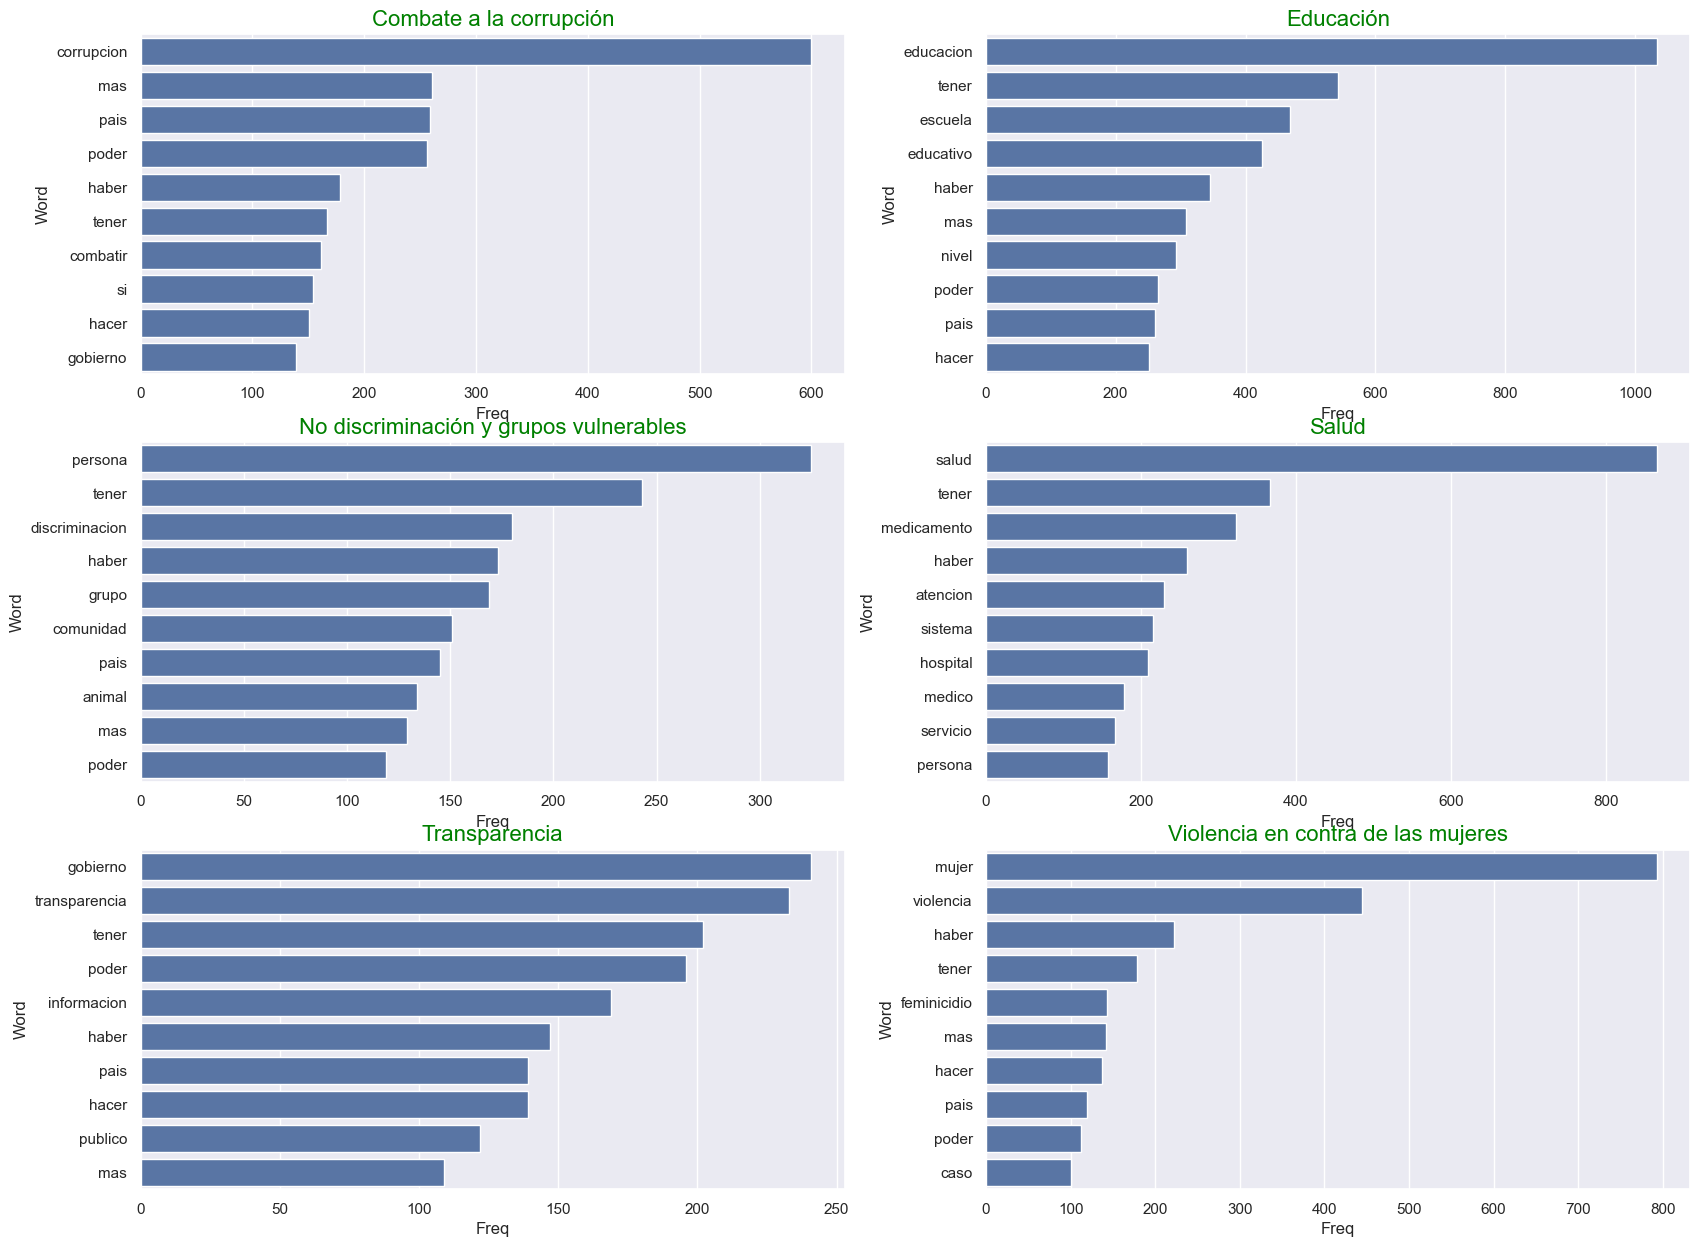

In [18]:
plot_n_grams('tema', 10)

##### Bi-gramas

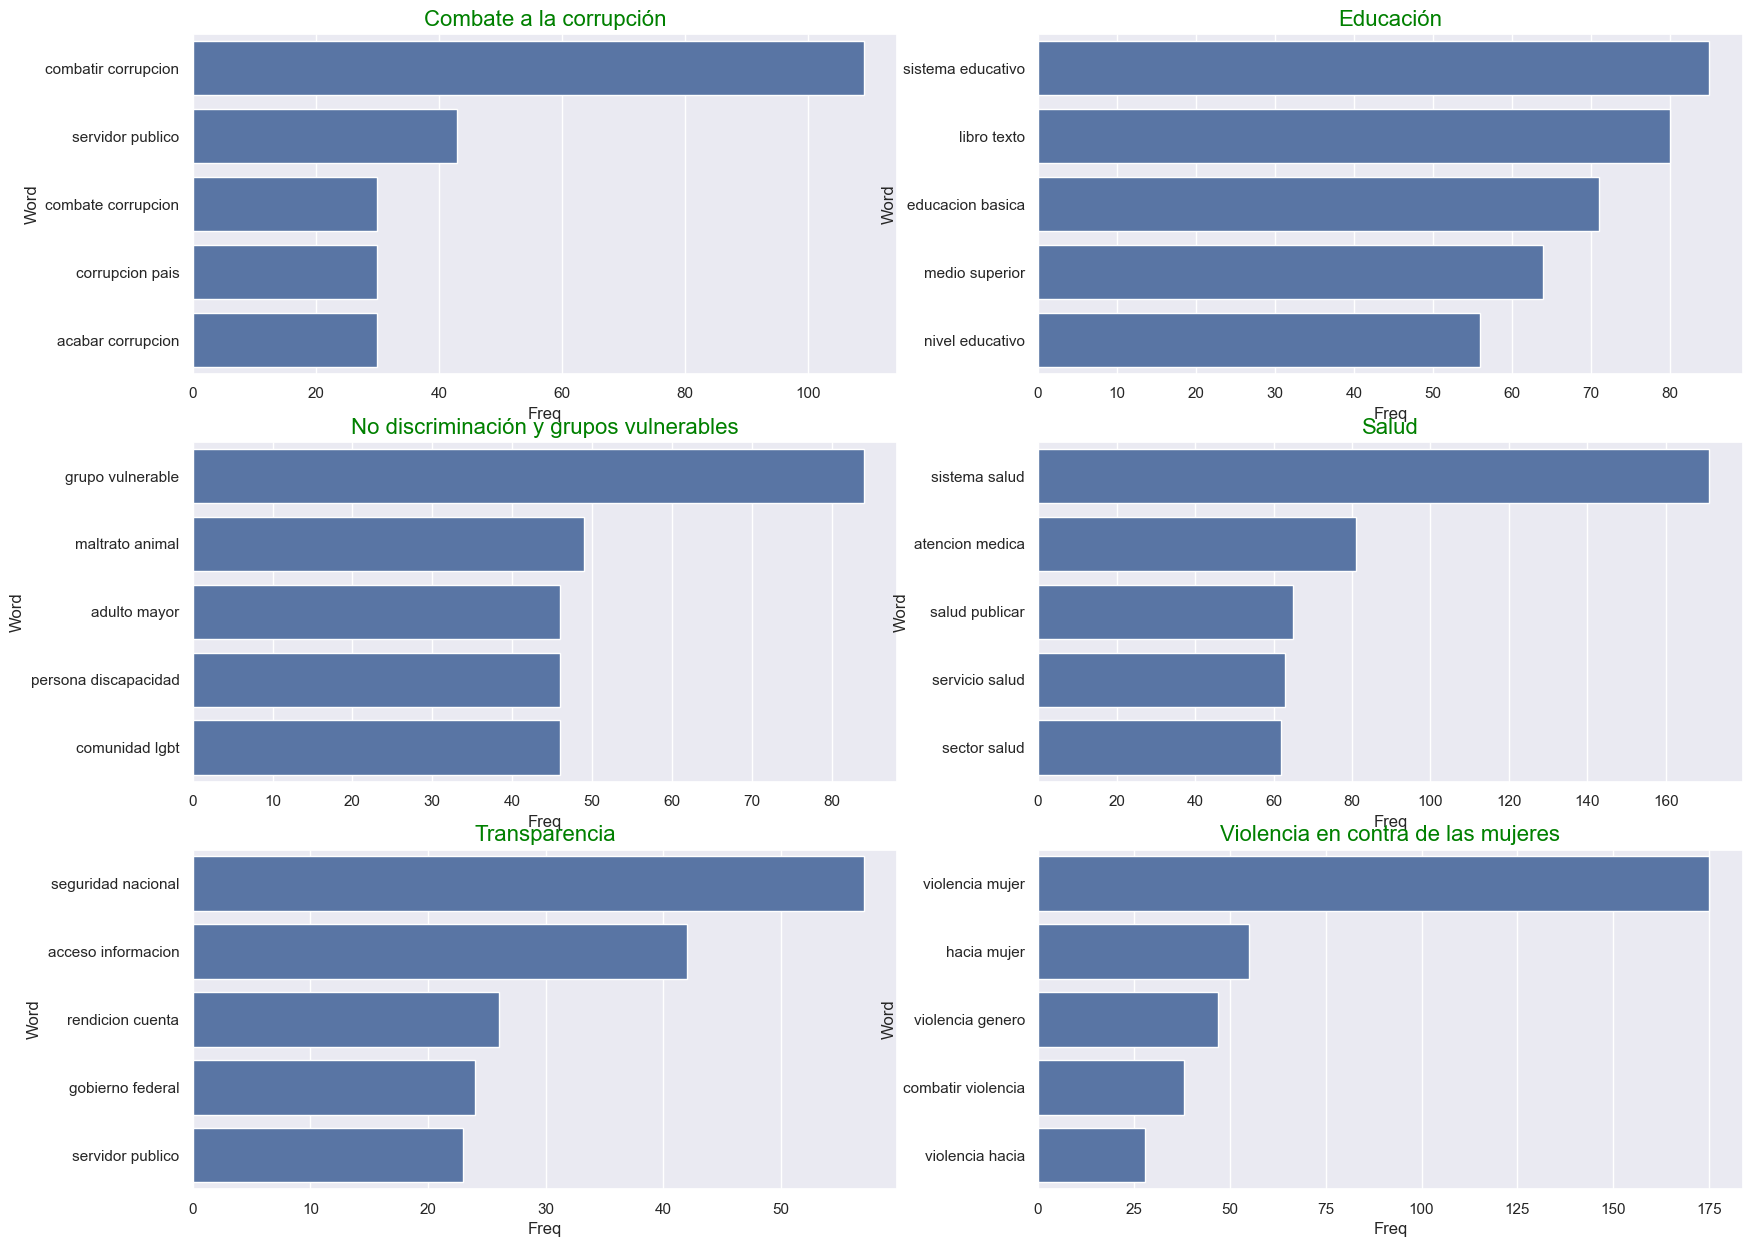

In [19]:
plot_n_grams('tema', 5, ngram_range=(2,2))

##### Tri-gramas

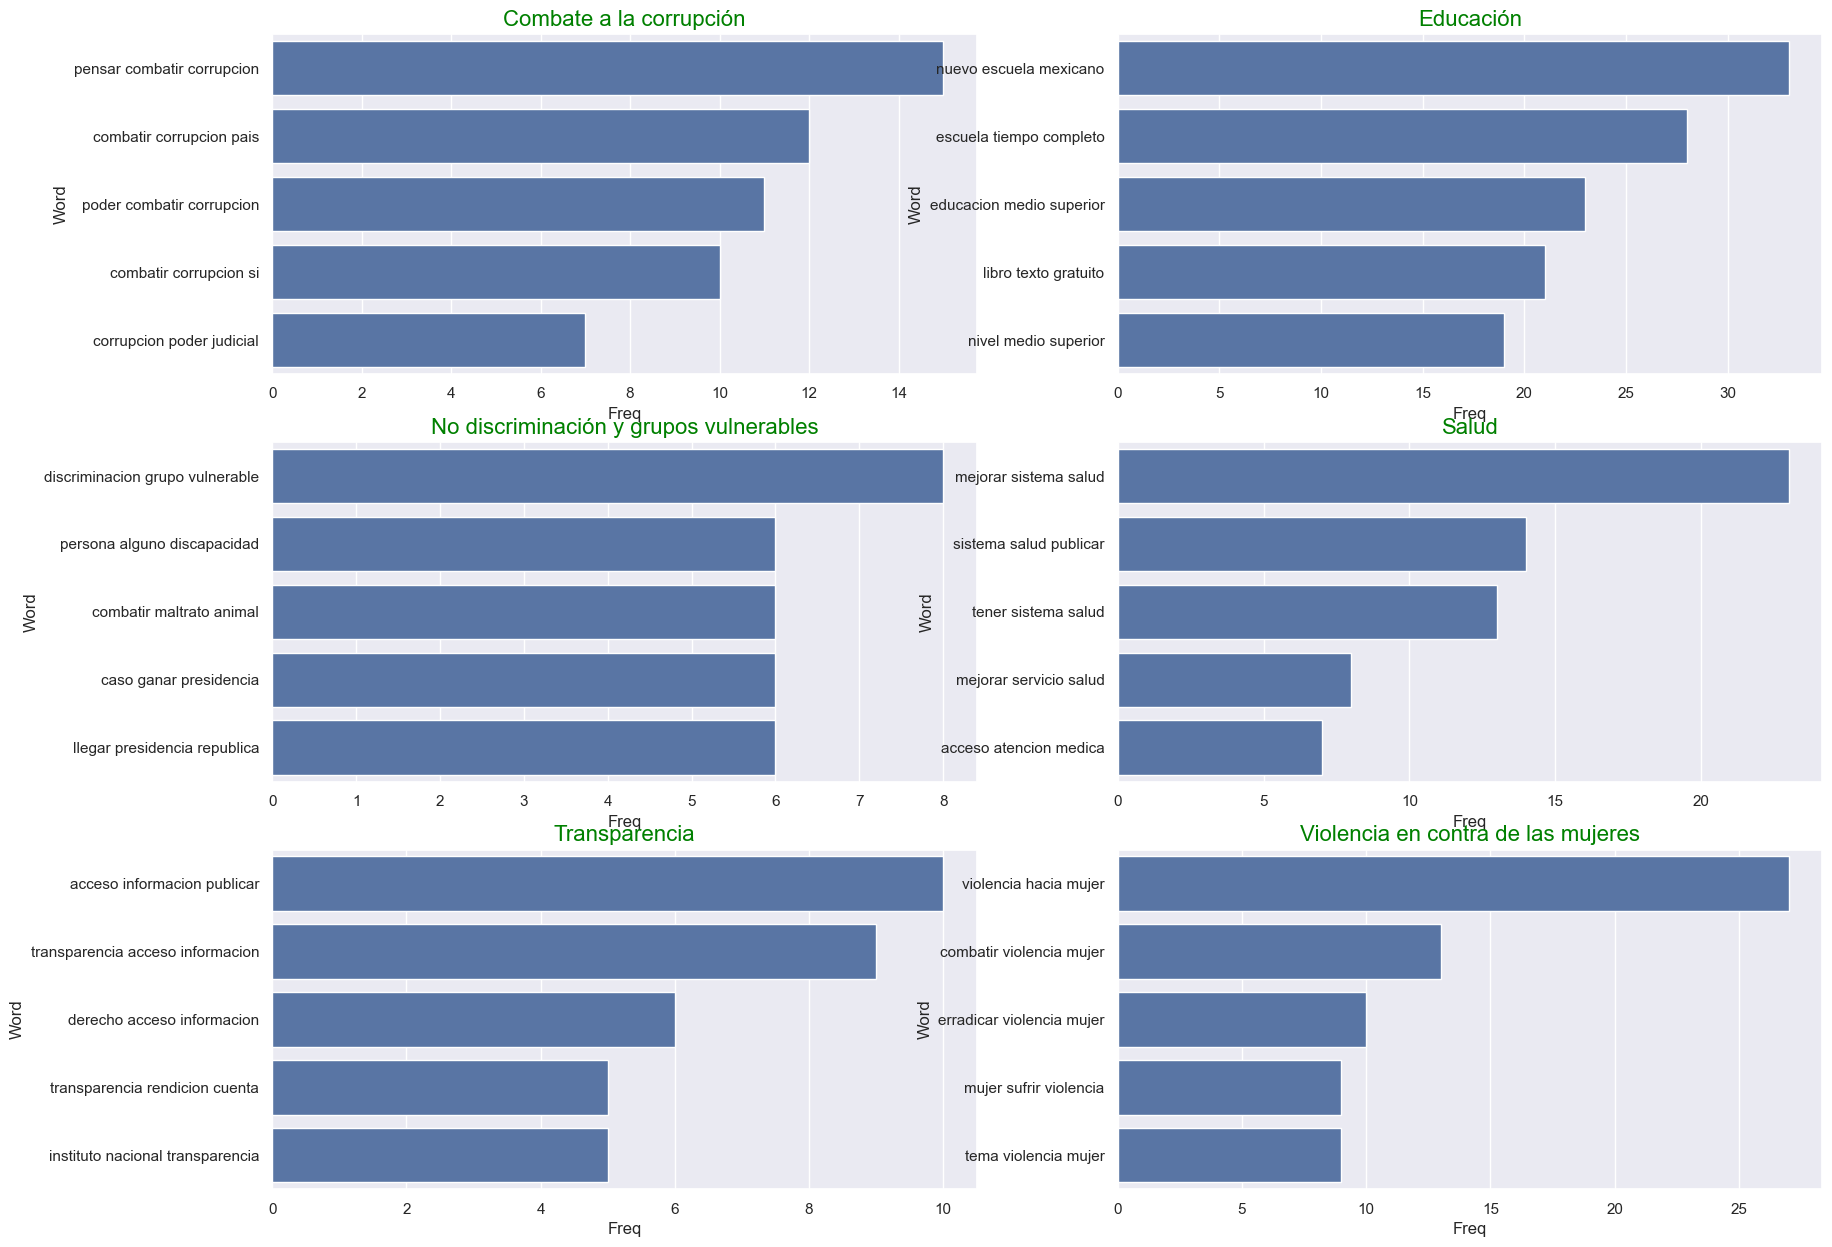

In [20]:
plot_n_grams('tema', 5, ngram_range=(3,3))

### Por entidad
#### Nube de palabaras

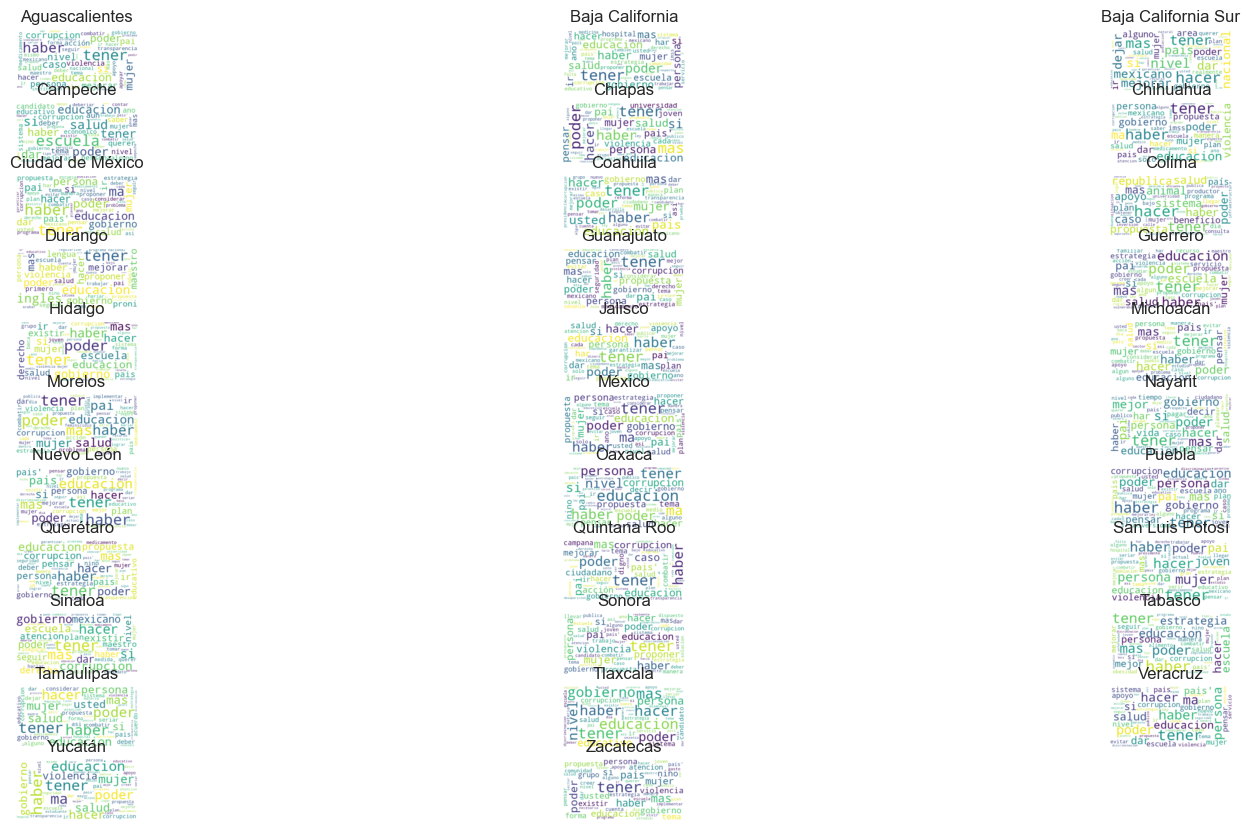

In [21]:
wc_generator_by('entidad')

#### Bi-gramas

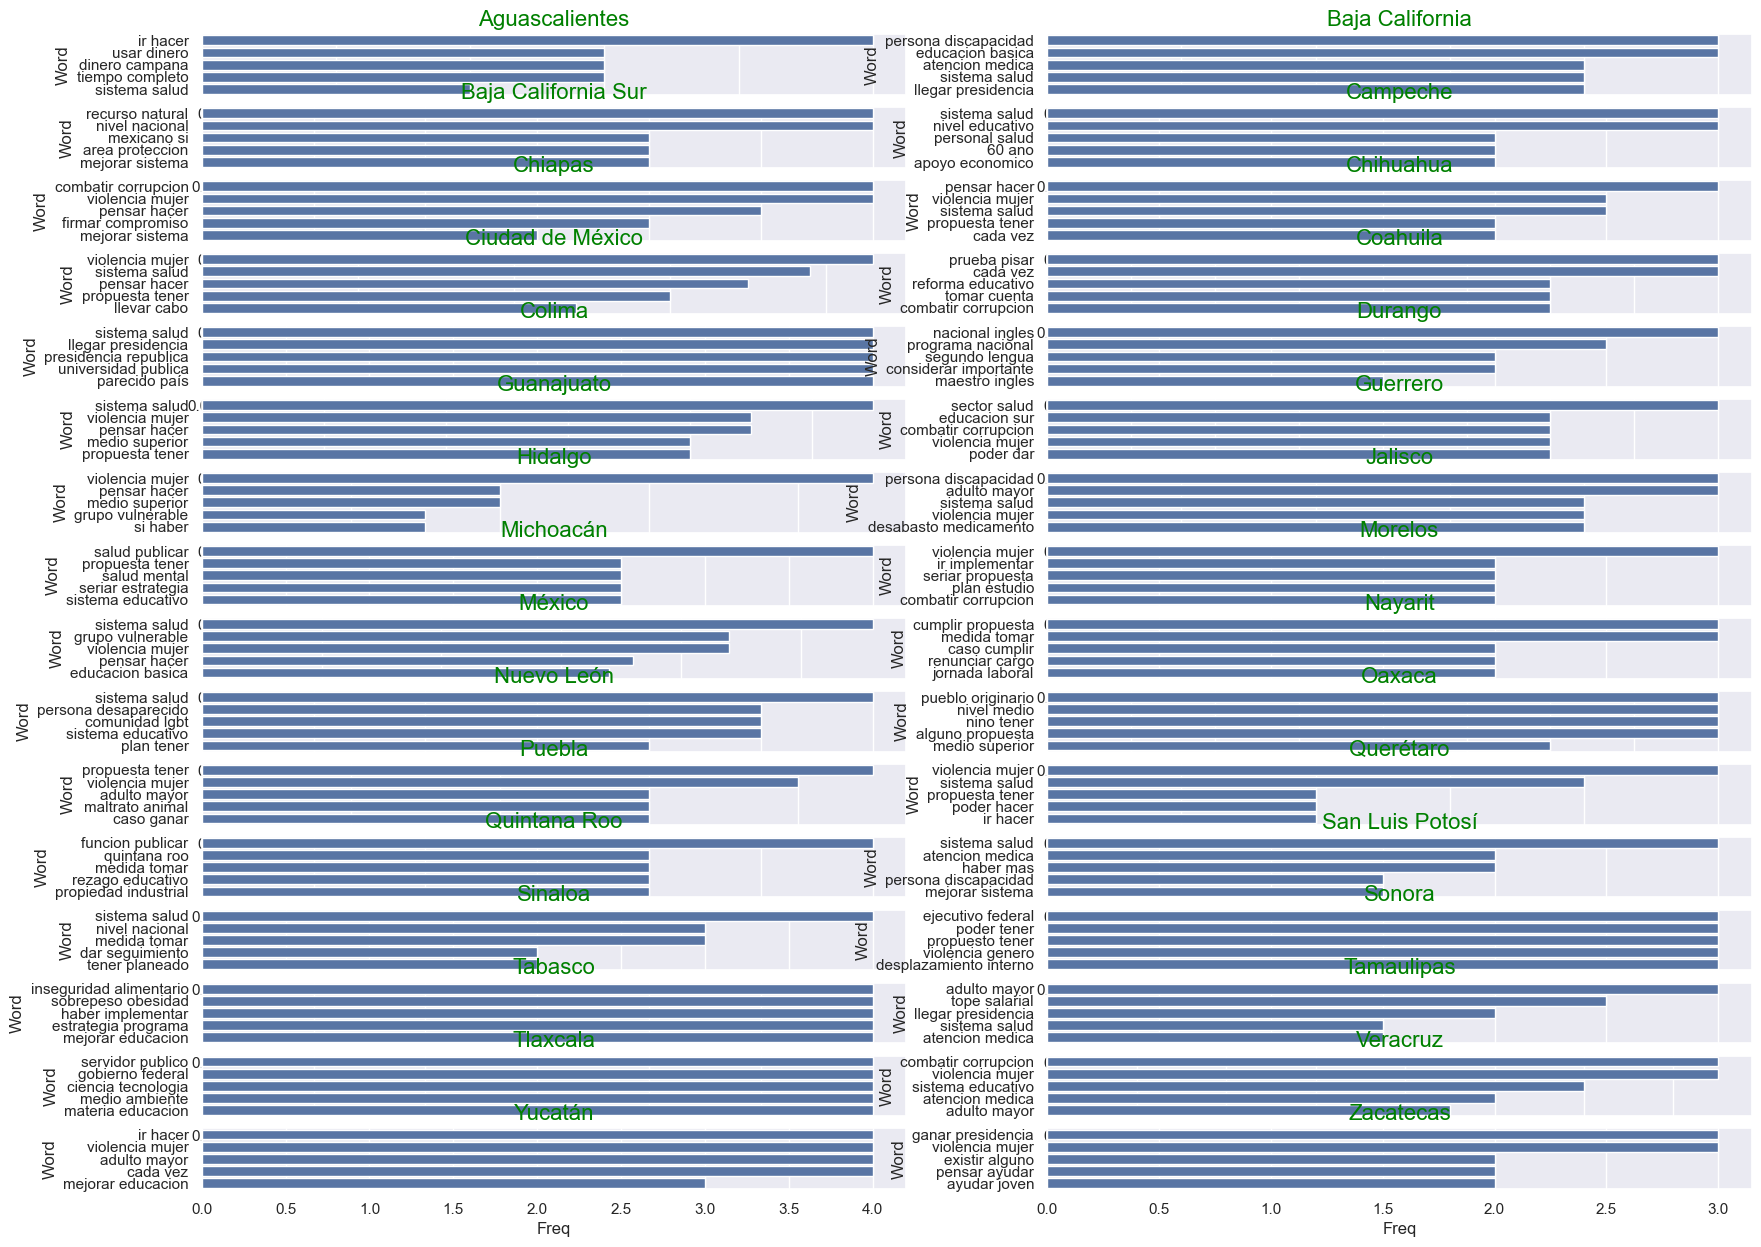

In [22]:
plot_n_grams('entidad',5, ngram_range=(2,2))

### Tri-gramas

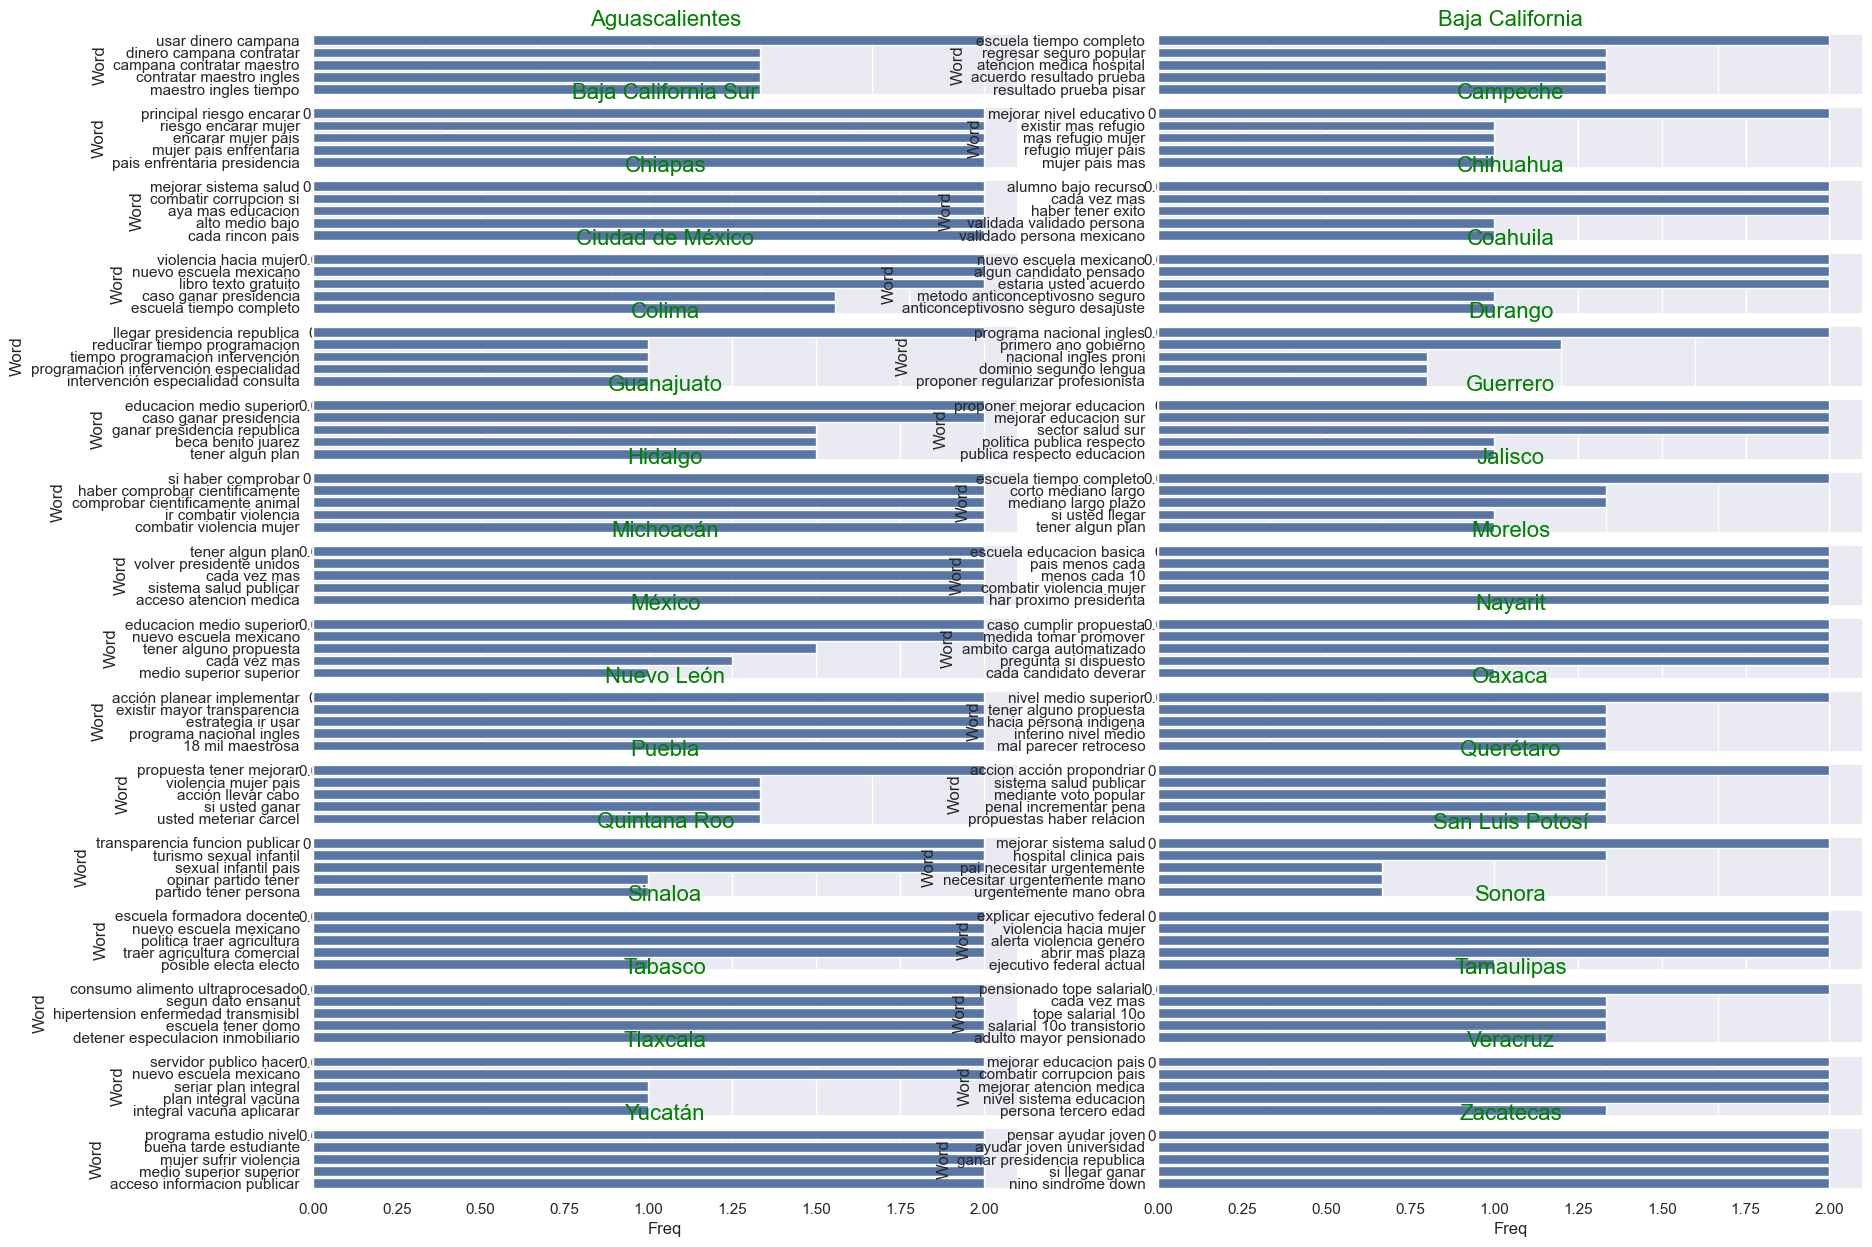

In [23]:
plot_n_grams('entidad', 5, ngram_range=(3,3))

### Por genero
#### Nube de palabras

Al parecer hay basura en el genero

In [24]:
limpio_df['genero'] = limpio_df['genero'].apply(lambda s: s if s != 'Selecciona' else 'Otro')

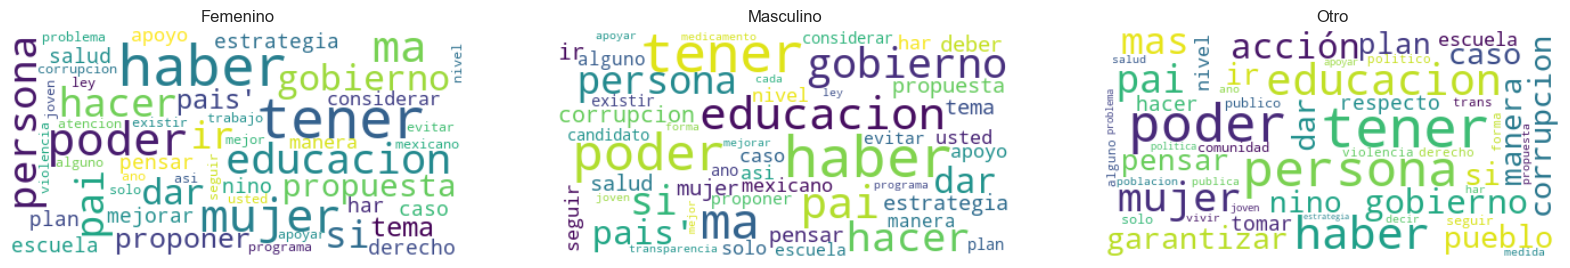

In [25]:
wc_generator_by('genero')


4. **Separa las preguntas por tema y realiza un análisis de sentimientos y de emociones.**
    1. Muestra los resultados en forma tabular o gráfica

#### Bi-gramas

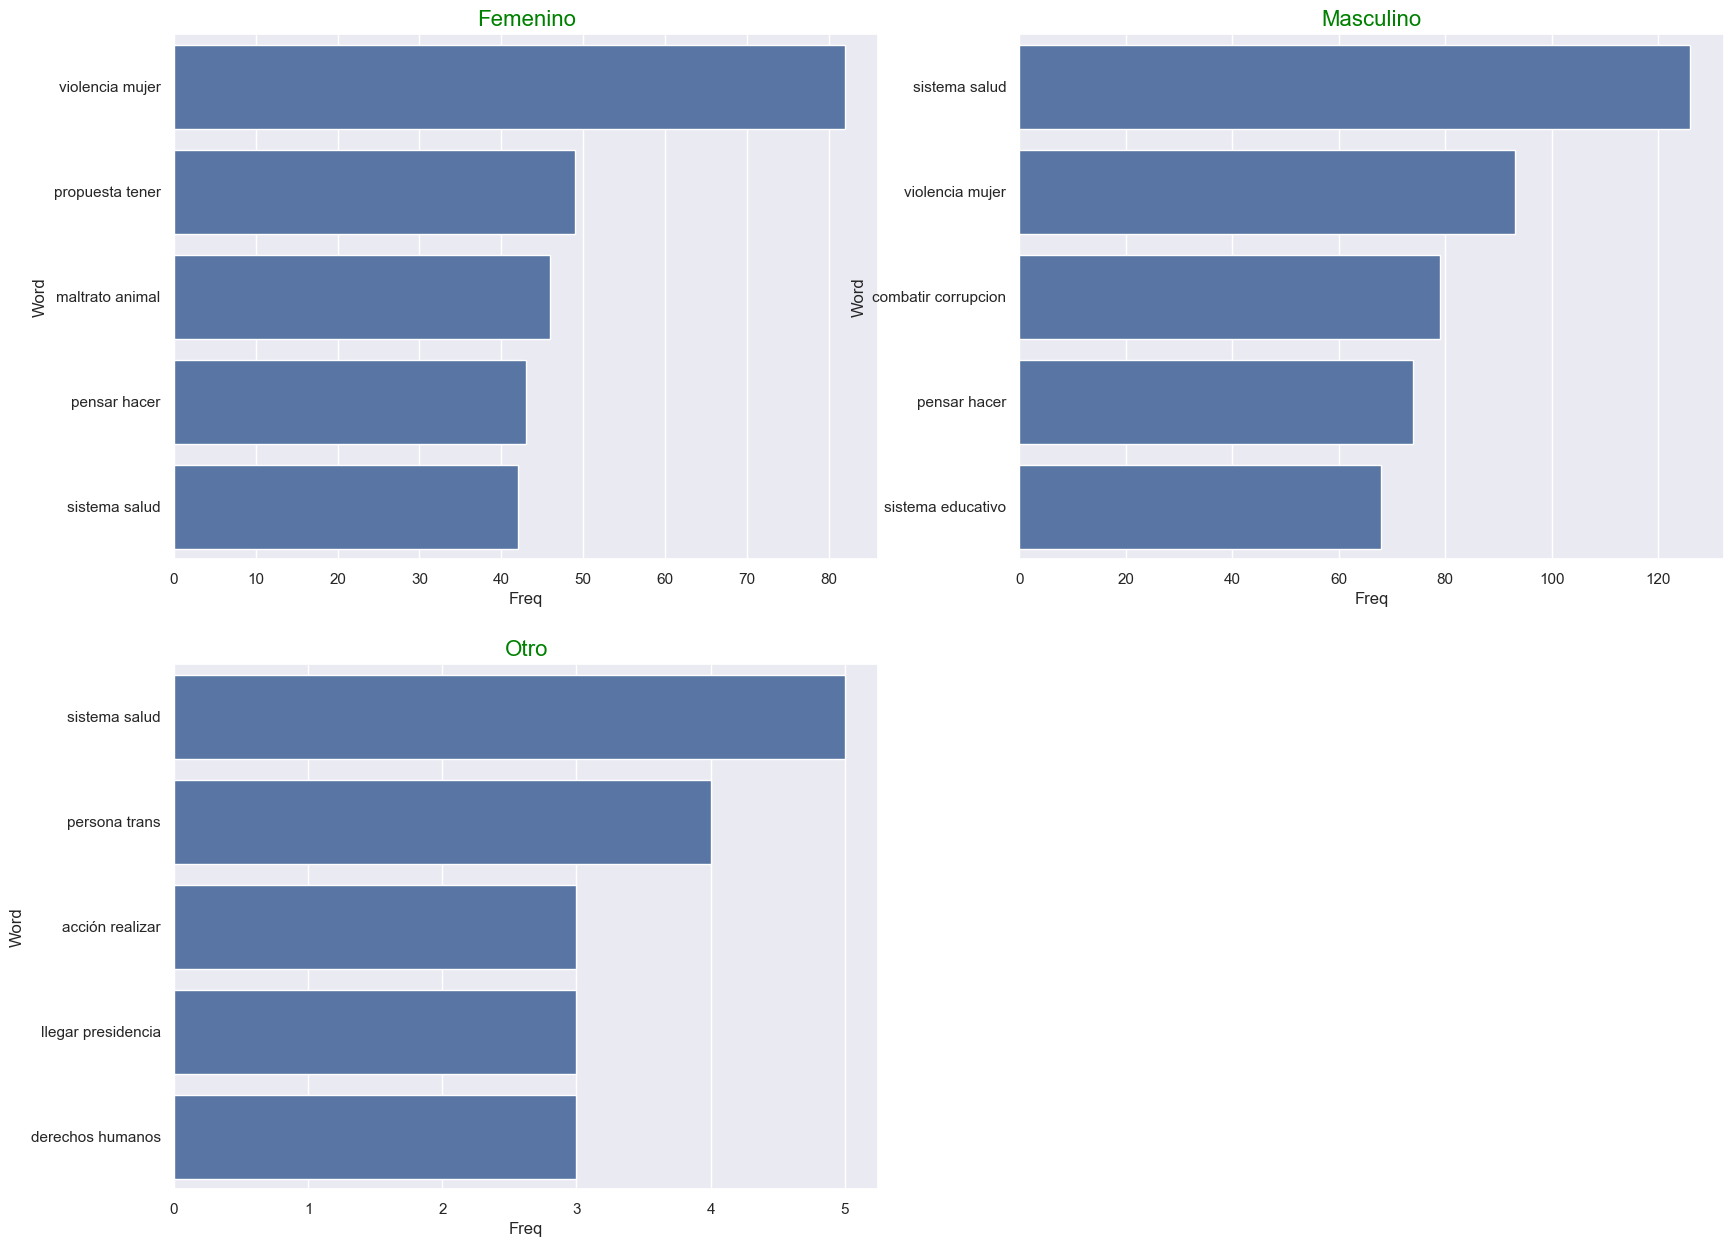

In [26]:
plot_n_grams('genero', 5, ngram_range=(2,2))

#### Tri-gramas

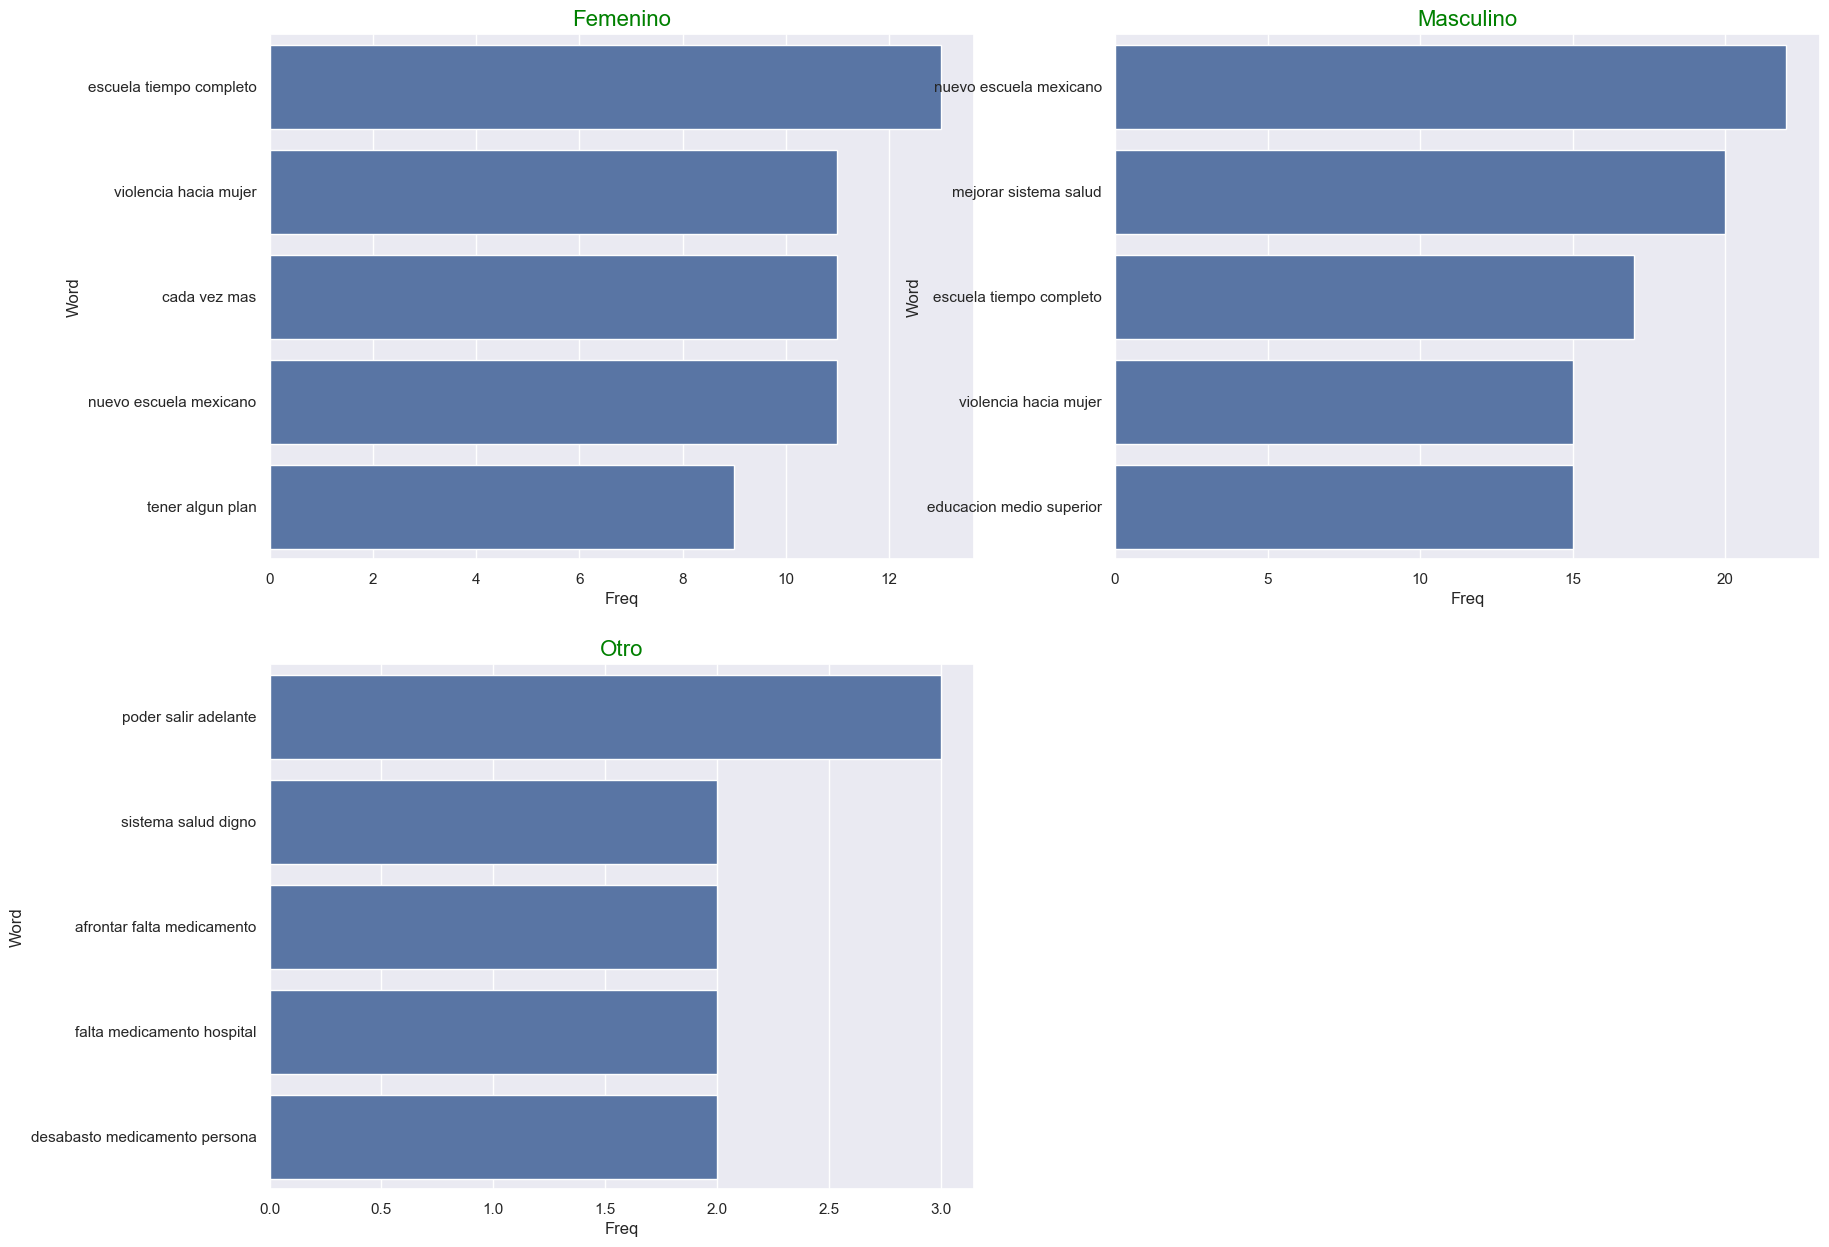

In [27]:
plot_n_grams('genero', 5, ngram_range=(3,3))

4. **Separa las preguntas por tema y realiza un análisis de sentimientos y de emociones.**
    1. Muestra los resultados en forma tabular o gráfica

Checamos que metodo da mejores rsultados, si con el texto normalizado o crudo

In [28]:
from pysentimiento import create_analyzer
import transformers
transformers.logging.set_verbosity(transformers.logging.ERROR)

In [29]:
analyzer = create_analyzer(task='sentiment', lang='es')

c:\Users\Rodolfo\.conda\envs\mining\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [30]:
print(limpio_df['pregunta'][0])
analyzer.predict(limpio_df['pregunta'][0])

En México muchas personas se quejan del sistema de salud, ¿cómo planean mejorarlo, en el sentido de que haya medicamentos y se pueda acudir con un médico rápidamente, en cualquier municipio y recibir un buen trato?


AnalyzerOutput(output=NEG, probas={NEG: 0.754, NEU: 0.230, POS: 0.016})

In [31]:
print(limpio_df['norm_text'][0])
analyzer.predict(limpio_df['norm_text'][0])

persona quejar sistema salud planean mejorar haber medicamento poder acudir medico rapidamente cualquiera municipio recibir buen trato


AnalyzerOutput(output=NEU, probas={NEU: 0.785, POS: 0.177, NEG: 0.039})

Parece que funciona relativamente igual, vamos a usar el texto normalizado ya que son menos palabras por lo que requiere menos tiempo de procesamiento

In [32]:
limpio_df['sentimiento'] = limpio_df['norm_text'].apply(lambda texto: analyzer.predict(texto).output)

<Axes: >

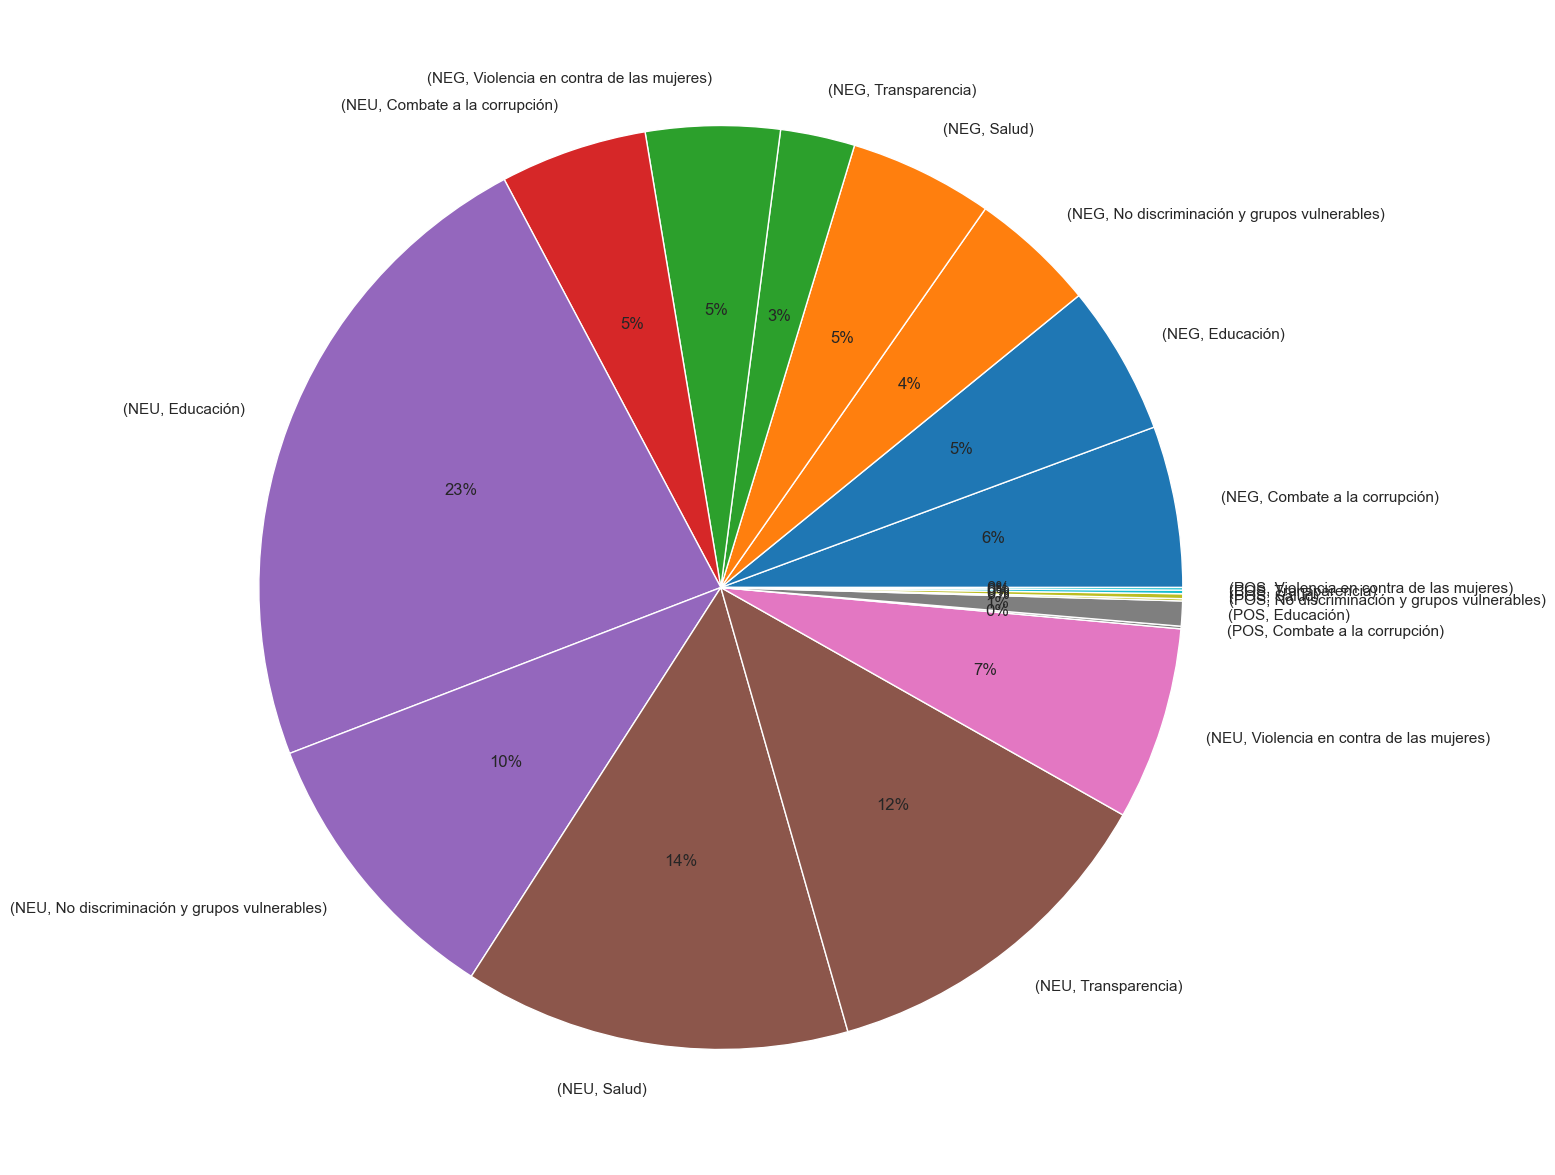

In [33]:
limpio_df.groupby(['sentimiento', 'tema']).size().plot(kind='pie', autopct='%.0f%%', cmap='tab10')

In [34]:
analyzer = create_analyzer(task='emotion', lang='es')

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

c:\Users\Rodolfo\.conda\envs\mining\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Rodolfo\.cache\huggingface\hub\models--pysentimiento--robertuito-emotion-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

c:\Users\Rodolfo\.conda\envs\mining\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [35]:
limpio_df['emotion'] = limpio_df['norm_text'].apply(lambda texto: analyzer.predict(texto).output)

<Axes: >

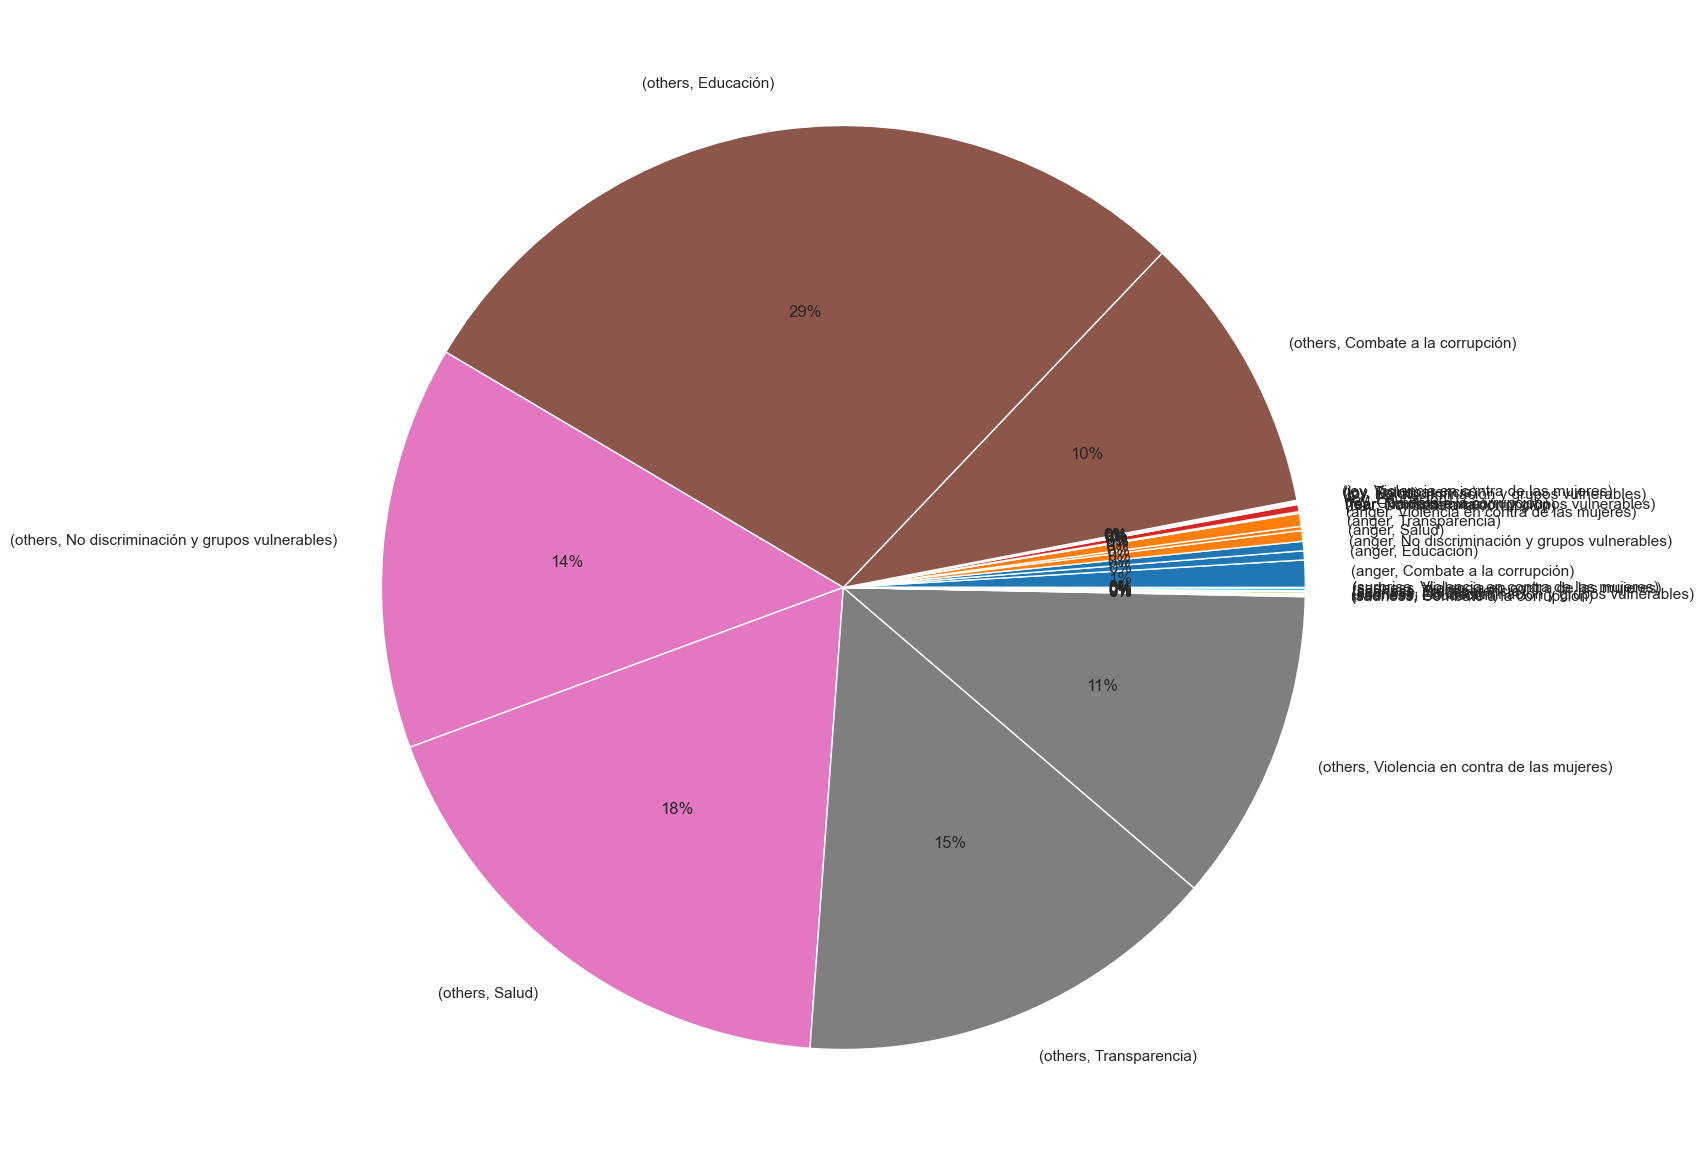

In [36]:
limpio_df.groupby(['emotion', 'tema']).size().plot(kind='pie', autopct='%.0f%%', cmap='tab10')